## 100DaysOfBytewise Machine Learning Fellowship 


### Project : Analyzed Education data to predict graduation rates 

# Loading and exploring the data

In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Cleaned_data.csv')

# Display the first few rows of the dataset
print(data.head())

# # Check for any missing values
print(data.isnull().sum())

# # # Display basic statistics of the dataset
print(data.describe())

   Marital status  Daytime/evening attendance  Previous qualification  \
0               1                           1                       1   
1               1                           1                       1   
2               1                           1                       1   
3               1                           1                       1   
4               2                           0                       1   

   Nationality  Mother qualification  Father qualification  \
0            1                    13                    10   
1            1                     1                     3   
2            1                    22                    27   
3            1                    23                    27   
4            1                    22                    28   

   Tuition fees up to date  Gender  Scholarship holder  International  \
0                        1       1                   0              0   
1                        0       1        

# Data pre-processing 

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display the first few rows of the processed dataset
print(data.head())


   Marital status  Daytime/evening attendance  Previous qualification  \
0               1                           1                       1   
1               1                           1                       1   
2               1                           1                       1   
3               1                           1                       1   
4               2                           0                       1   

   Nationality  Mother qualification  Father qualification  \
0            1                    13                    10   
1            1                     1                     3   
2            1                    22                    27   
3            1                    23                    27   
4            1                    22                    28   

   Tuition fees up to date  Gender  Scholarship holder  International  \
0                        1       1                   0              0   
1                        0       1        

# Data visualization

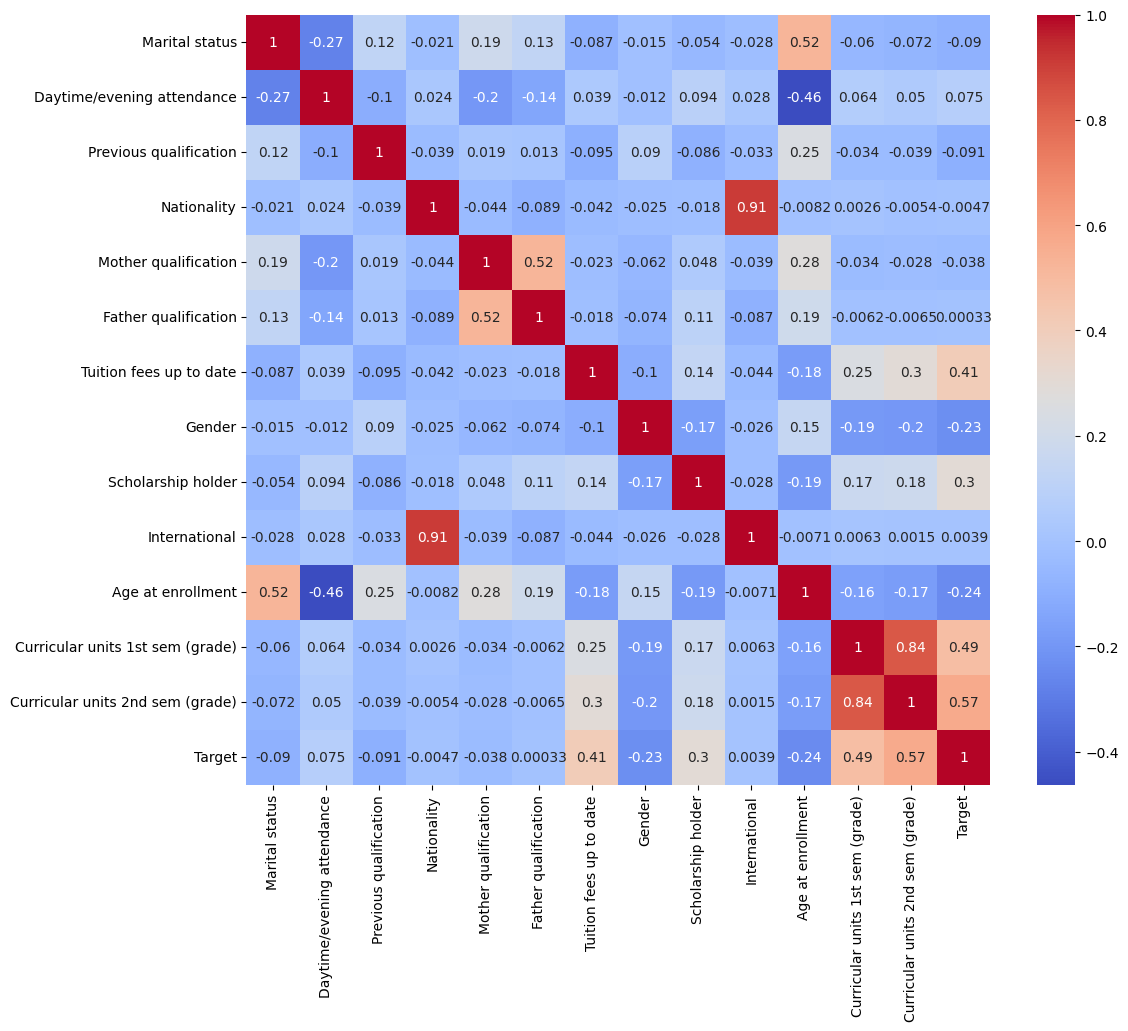

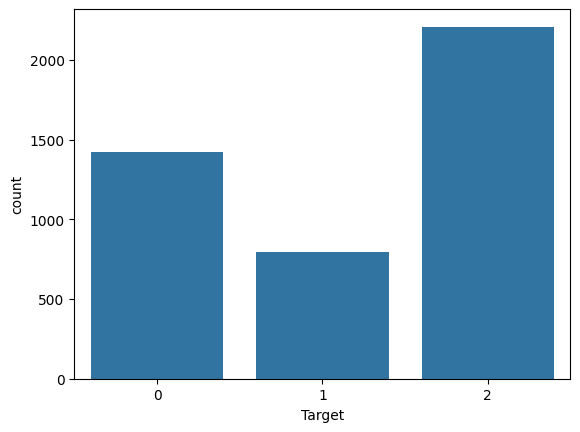

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Plot distribution of the target variable
sns.countplot(x='Target', data=data)
plt.show()


# Basic Statistics 

In [13]:
# Calculate and print the mean and standard deviation of each column
print(data.mean())
print(data.std())


Marital status                       1.178571
Daytime/evening attendance           0.890823
Previous qualification               2.531420
Nationality                          1.254521
Mother qualification                12.322107
Father qualification                16.455244
Tuition fees up to date              0.880651
Gender                               0.351718
Scholarship holder                   0.248418
International                        0.024864
Age at enrollment                   23.265145
Curricular units 1st sem (grade)    10.640822
Curricular units 2nd sem (grade)    10.230206
Target                               1.178119
dtype: float64
Marital status                       0.605747
Daytime/evening attendance           0.311897
Previous qualification               3.963707
Nationality                          1.748447
Mother qualification                 9.026251
Father qualification                11.044800
Tuition fees up to date              0.324235
Gender             

# Building the linear Regression model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = data.drop(columns='Target')
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluating the model 

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.47843157660988384
R-squared: 0.4137550390805239
